In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/d/isaevaannaofficial/titanic/train.csv
/kaggle/input/d/isaevaannaofficial/titanic/test.csv


In [2]:
data = pd.read_csv('/kaggle/input/d/isaevaannaofficial/titanic/train.csv')


In [3]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
categorical_data = []
for column_name in data.columns:
    if not (pd.api.types.is_integer_dtype(data[column_name]) or pd.api.types.is_float_dtype(data[column_name])):
        categorical_data.append(column_name)  # Добавляем имя столбца в списоk

print(categorical_data)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [5]:
categorical_data.remove('Name')
categorical_data.remove('Ticket')

In [6]:
categorical_data

['Sex', 'Cabin', 'Embarked']

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='SibSp', ylabel='count'>

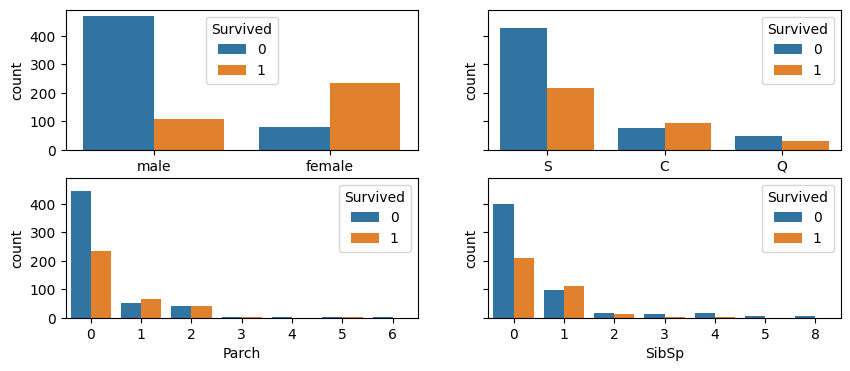

In [8]:
_, axes = plt.subplots(2, 2, sharey=True, figsize=(10, 4))


sns.countplot(x="Sex", hue="Survived", data=data, ax=axes[0, 0])
sns.countplot(x="Parch", hue="Survived", data=data, ax=axes[1, 0]) # количество детей 
sns.countplot(x="Embarked", hue="Survived", data=data, ax=axes[0, 1]) 
sns.countplot(x="SibSp", hue="Survived", data=data, ax=axes[1, 1]) # количество братьев и сестер  

In [9]:
'''Про то, как влияло количество детей, братьев и сестре на выживаемость пока вообще непонятно

порт посадки на борт (Embaekrd) вряд ли влиял на выживаемость, так что вообще удалю его вместе с именем, билетом'''
categorical_data.remove('Embarked')


In [10]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
nan_count = data['Cabin'].isna().sum()

print(f"Количество значений NaN в столбце 'Cabin': {nan_count}")


Количество значений NaN в столбце 'Cabin': 687


In [12]:
'''слишком много пропусков в столюике с кабинами, так что думаю, разумно его вообще убрать '''
categorical_data.remove('Cabin')

In [13]:
categorical_data

['Sex']

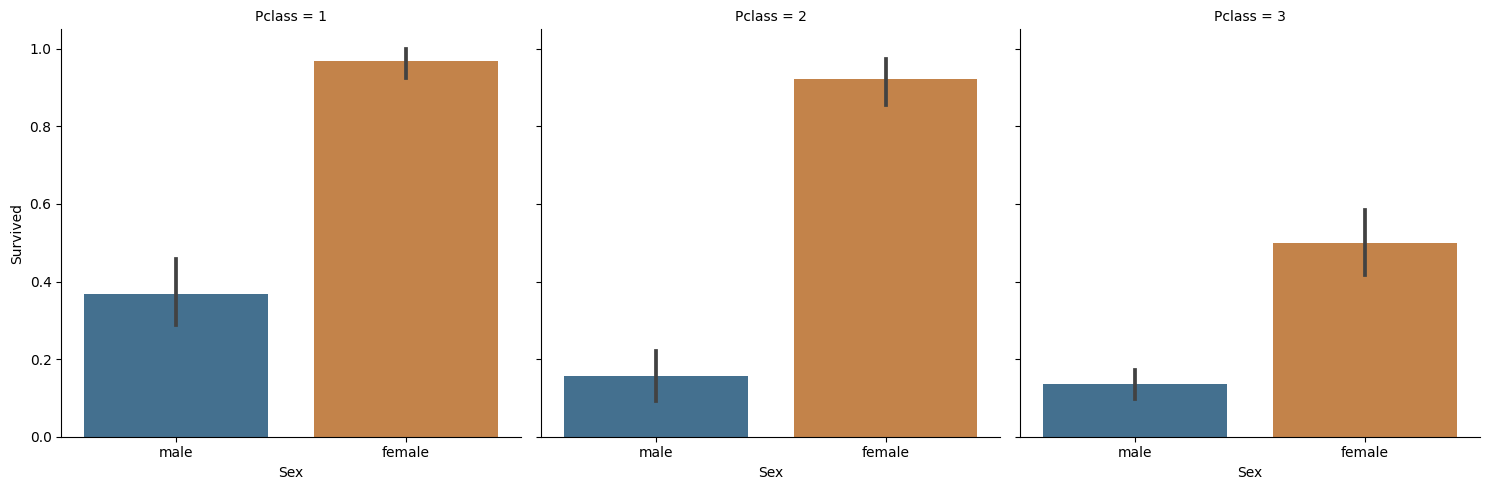

In [14]:
sns.catplot(data = data,y='Survived',x='Sex',col='Pclass',
            kind='bar', saturation=0.5)

In [15]:
'''минимальный шанс выжить у мужчин из третьего класса'''

'минимальный шанс выжить у мужчин из третьего класса'

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for column_name in data.columns:
    if column_name in categorical_data:
        data[column_name] = labelencoder.fit_transform(data[column_name])
        print(labelencoder.classes_)

data.head()

['female' 'male']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data = data.drop(labels = ['Cabin', 'Embarked', 'Ticket', 'Name'], axis = 1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

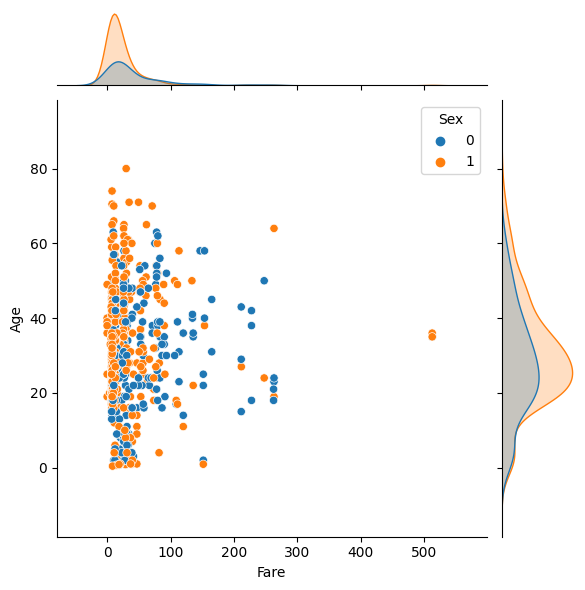

In [18]:
#plt.figure(figsize=(5,4))
sns.jointplot(x="Fare", y='Age',hue = 'Sex', data = data, kind = 'scatter')

In [19]:
# судя по гистограмме, тарифв для женщин выше и путешествие им обходилось дороже (проверю по критерию Манни-Уитни)

from scipy.stats import mannwhitneyu 

men = data[data.Sex == 1] 
women = data[data.Sex == 0]

stat, p = mannwhitneyu(men.Fare, women.Fare)
print('Критерий значимости = %.3f' % (p))
alpha = 0.1
if p > alpha:
  print('Возраст не отличался')
else: 
  print('Действительно разный тариф, мужчины ',
        men.Fare.mean(),', женщины ', women.Fare.mean())

Критерий значимости = 0.000
Действительно разный тариф, мужчины  25.523893414211443 , женщины  44.47981783439491


In [20]:
# может быть они просто чаще были в первом классе?

crosstab = pd.crosstab(data['Sex'], data['Pclass'])

percentage_by_class = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

print("Процент мужчин и женщин в каждом классе:")
print(percentage_by_class)

Процент мужчин и женщин в каждом классе:
Pclass          1          2          3
Sex                                    
0       29.936306  24.203822  45.859873
1       21.143847  18.717504  60.138648


In [21]:
'''0       29.936306  24.203822  45.859873
1       21.143847  18.717504  60.138648

=> женщины чаще выбирали первый класс'''

'0       29.936306  24.203822  45.859873\n1       21.143847  18.717504  60.138648\n\n=> женщины чаще выбирали первый класс'

/tmp/ipykernel_18/894847595.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], ax = axes[0] )
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/894847595.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

<Axes: xlabel='Fare', ylabel='Density'>

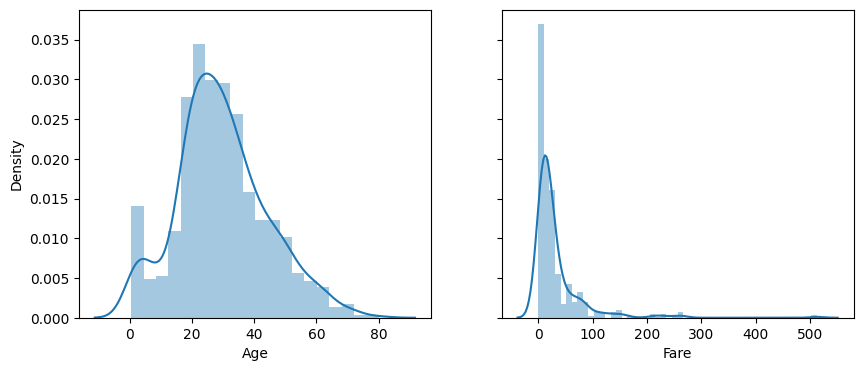

In [22]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.distplot(data['Age'], ax = axes[0] )
sns.distplot(data['Fare'], ax = axes[1] )

#data['Cabin'].plot(kind = 'density', ax = axes[0,1])

In [23]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,NaN,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


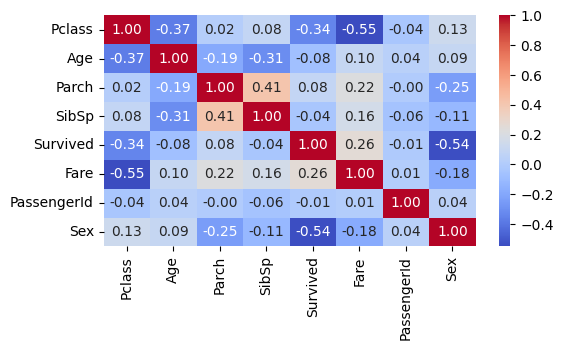

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#features = ['Sex', 'Cabin', 'Embarked']
#data[features].hist(figsize=(15, 5))
numerical = list(set(data.columns))
corr_matrix = data[numerical].corr()

# Визуализация тепловой карты с корреляцией
plt.figure(figsize=(6, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('')
plt.show()

In [25]:
'''максимальная связь с тарифом, пол и классом'''

'максимальная связь с тарифом, пол и классом'

In [26]:
for column_name in data.columns:
    if column_name != 'PassengerId' and column_name!= 'Survived':
        print(pd.crosstab(data['Survived'], data[column_name], normalize = True), '\n\n\n')
        

Pclass           1         2         3
Survived                              
0         0.089787  0.108866  0.417508
1         0.152637  0.097643  0.133558 



Sex              0         1
Survived                    
0         0.090909  0.525253
1         0.261504  0.122334 



Age          0.42      0.67      0.75      0.83      0.92      1.00   \
Survived                                                               
0         0.000000  0.000000  0.000000  0.000000  0.000000  0.002801   
1         0.001401  0.001401  0.002801  0.002801  0.001401  0.007003   

Age          2.00      3.00      4.00      5.00   ...     62.00     63.00  \
Survived                                          ...                       
0         0.009804  0.001401  0.004202  0.000000  ...  0.002801  0.000000   
1         0.004202  0.007003  0.009804  0.005602  ...  0.002801  0.002801   

Age          64.00     65.00     66.00     70.00     70.50     71.00  \
Survived                                          

In [27]:
data.Age = data.Age.fillna(data.Age.mean())
data.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
y = data['Survived']
data = data.drop(labels = ['Survived'], axis = 1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.5, random_state=42)



In [30]:
tree_params = {'max_depth': range(2,11)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier( random_state=17), tree_params, cv=5, verbose = True) # you code here                     

locally_best_tree.fit(X_train, y_train)

print('Best parametrs: ', locally_best_tree.best_params_)
print('Best score: ', locally_best_tree.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parametrs:  {'max_depth': 3}
Best score:  0.8202247191011237


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
knn = KNeighborsClassifier(n_neighbors=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [32]:
knn_pred = knn.predict(X_holdout_scaled)
accuracy_score(y_test, knn_pred)

0.8071748878923767